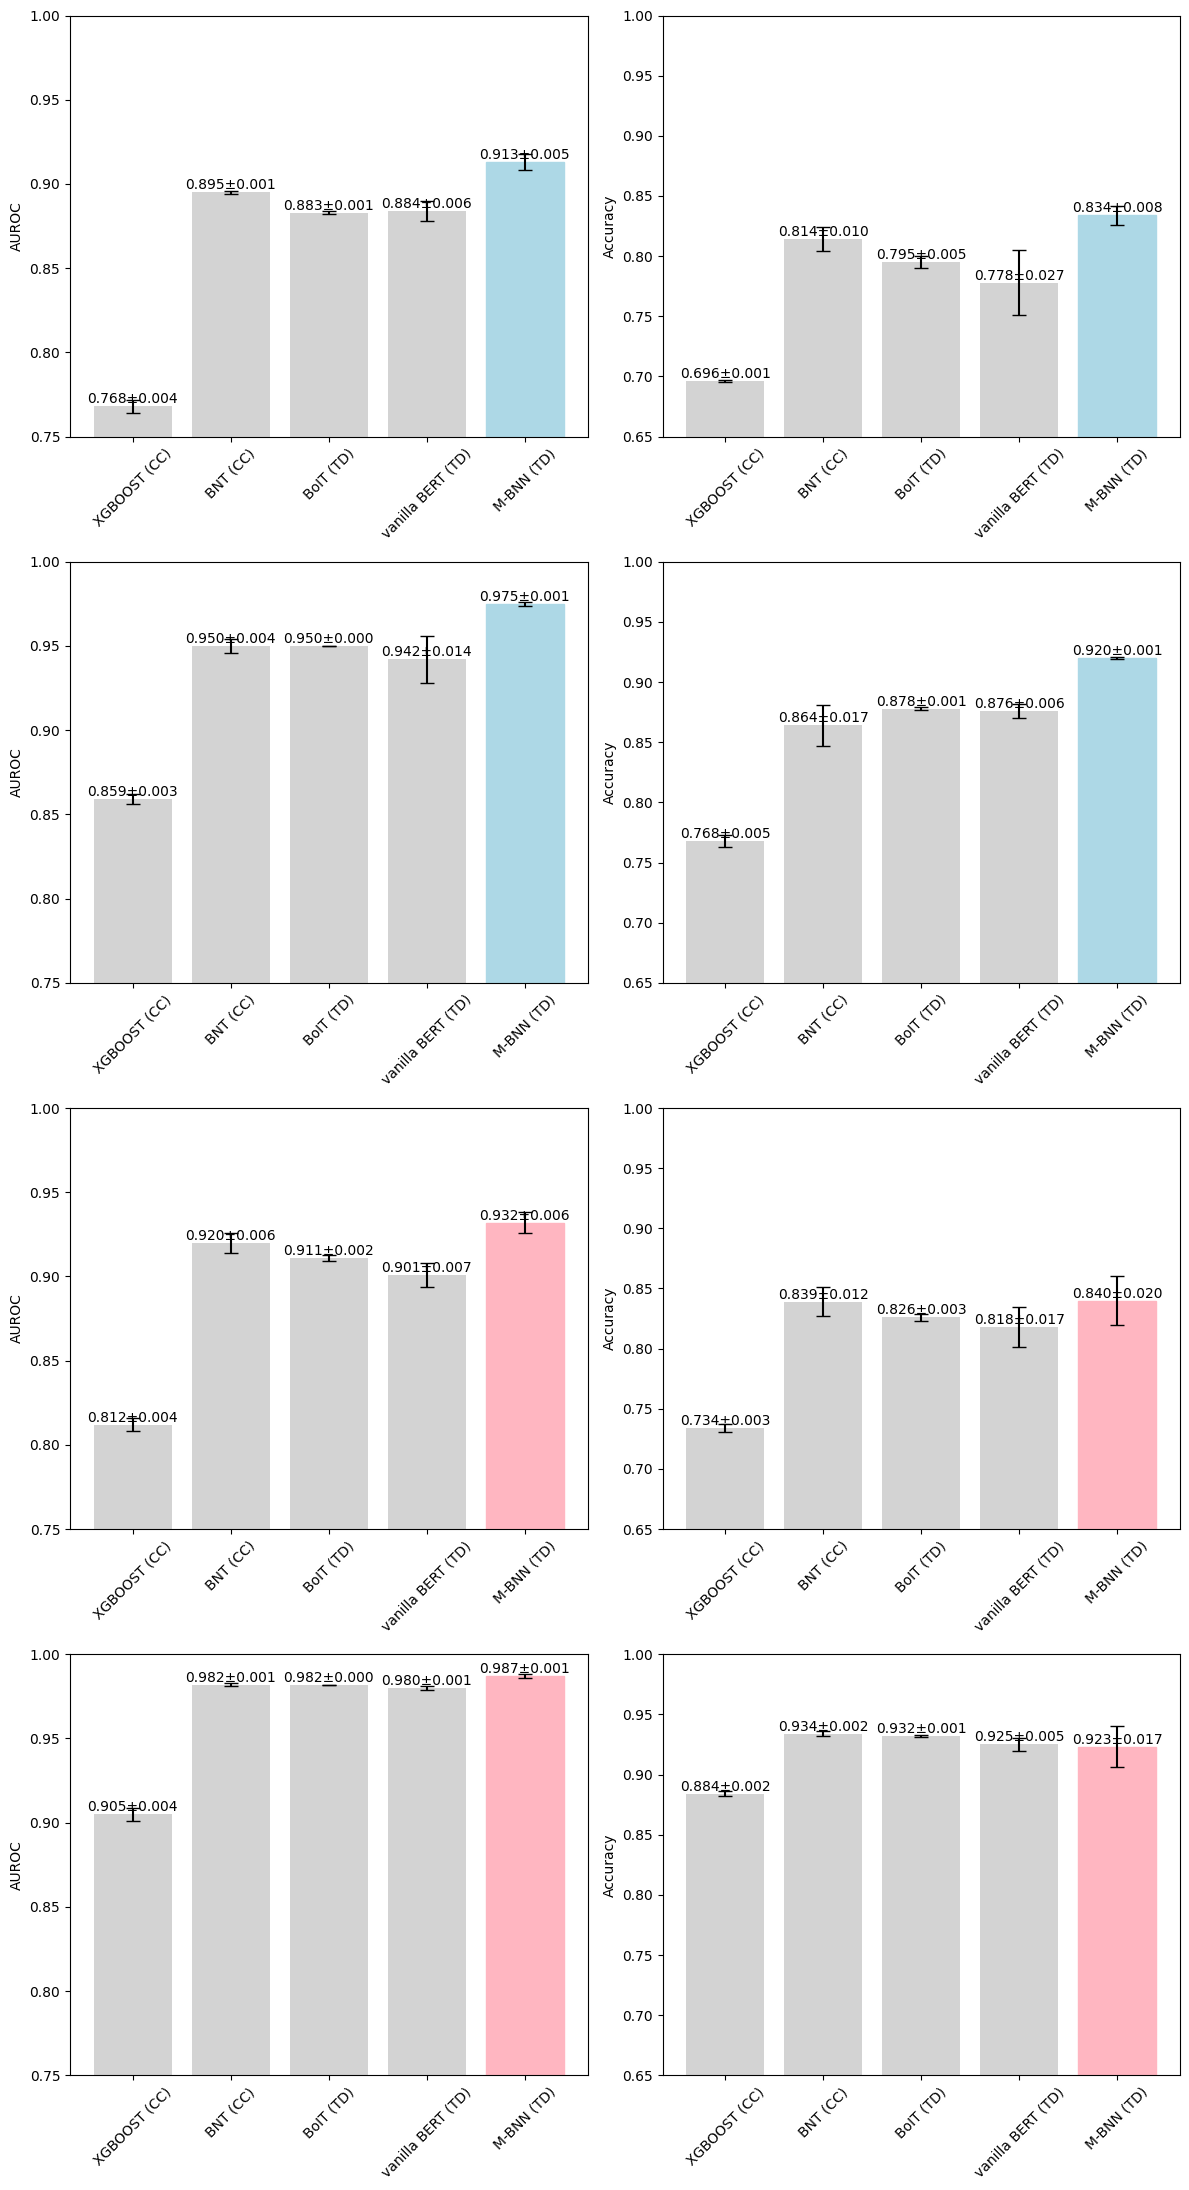

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 및 데이터 정의
models = ['XGBOOST (CC)', 'BNT (CC)', 'BoIT (TD)', 'vanilla BERT (TD)', 'M-BNN (TD)']
divfreq_index = models.index('M-BNN (TD)')

# 각 지표별 데이터
# ABCD Sex AUROC, Accuracy
abcd_sex_auroc = [0.768, 0.895, 0.883, 0.884, 0.913]
abcd_sex_accuracy = [0.696, 0.814, 0.795, 0.778, 0.834]

# UKB Sex AUROC, Accuracy
ukb_sex_auroc = [0.859, 0.950, 0.950, 0.942, 0.975]
ukb_sex_accuracy = [0.768, 0.864, 0.878, 0.876, 0.920]

# ABCD Sex AUROC, Accuracy (Schaefer)
abcd_sex_auroc_schaefer = [0.812, 0.920, 0.911, 0.901, 0.932]
abcd_sex_accuracy_schaefer = [0.734, 0.839, 0.826, 0.818, 0.840]

# UKB Sex AUROC, Accuracy (Schaefer)
ukb_sex_auroc_schaefer = [0.905, 0.982, 0.982, 0.980, 0.987]
ukb_sex_accuracy_schaefer = [0.884, 0.934, 0.932, 0.925, 0.923]

# 각 지표별 에러 값
error_abcd_sex_auroc = [0.004, 0.001, 0.001, 0.006, 0.005]
error_abcd_sex_accuracy = [0.001, 0.010, 0.005, 0.027, 0.008]
error_ukb_sex_auroc = [0.003, 0.004, 0.000, 0.014, 0.001]
error_ukb_sex_accuracy = [0.005, 0.017, 0.001, 0.006, 0.001]
error_abcd_sex_auroc_schaefer = [0.004, 0.006, 0.002, 0.007, 0.006]
error_abcd_sex_accuracy_schaefer = [0.003, 0.012, 0.003, 0.017, 0.020]
error_ukb_sex_auroc_schaefer = [0.004, 0.001, 0.000, 0.001, 0.001]
error_ukb_sex_accuracy_schaefer = [0.002, 0.002, 0.001, 0.005, 0.017]

# 그래프 설정
fig, axes = plt.subplots(4, 2, figsize=(12, 22))


# 색상 설정: M-BNN 모델만 하늘색/분홍색, 나머지는 회색
colors = ['lightgray'] * len(models)
highlight_colors = ['lightblue', 'lightpink']  # 강조 색상 설정

# 그래프 그리기 함수
def plot_bar(ax, values, errors, title, color_idx):
    bars = ax.bar(models, values, yerr=errors, color=colors, capsize=5)
    bars[divfreq_index].set_color(highlight_colors[color_idx])  # M-BNN 강조
    
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{values[i]:.3f}±{errors[i]:.3f}',
                ha='center', va='bottom', fontsize=10)
    # ax.set_title(title)
    if 'Accuracy' in title:
        ax.set_ylim(0.65, 1.00)  # y축 범위 설정
    elif 'AUROC' in title:
        ax.set_ylim(0.75, 1.00)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("AUROC" if "AUROC" in title else "Accuracy")

# 그래프 그리기
plot_bar(axes[0, 0], abcd_sex_auroc, error_abcd_sex_auroc, "ABCD Sex AUROC (atlas HCP-MMP1)", 0)
plot_bar(axes[0, 1], abcd_sex_accuracy, error_abcd_sex_accuracy, "ABCD Sex Accuracy (atlas HCP-MMP1)", 0)
plot_bar(axes[1, 0], ukb_sex_auroc, error_ukb_sex_auroc, "UKB Sex AUROC (atlas HCP-MMP1)", 0)
plot_bar(axes[1, 1], ukb_sex_accuracy, error_ukb_sex_accuracy, "UKB Sex Accuracy (atlas HCP-MMP1)", 0)
plot_bar(axes[2, 0], abcd_sex_auroc_schaefer, error_abcd_sex_auroc_schaefer, "ABCD Sex AUROC (atlas Schaefer)", 1)
plot_bar(axes[2, 1], abcd_sex_accuracy_schaefer, error_abcd_sex_accuracy_schaefer, "ABCD Sex Accuracy (atlas Schaefer)", 1)
plot_bar(axes[3, 0], ukb_sex_auroc_schaefer, error_ukb_sex_auroc_schaefer, "UKB Sex AUROC (atlas Schaefer)", 1)
plot_bar(axes[3, 1], ukb_sex_accuracy_schaefer, error_ukb_sex_accuracy_schaefer, "UKB Sex Accuracy (atlas Schaefer)", 1)

# 레이아웃 조정 및 출력
plt.tight_layout() #rect=[0, 0, 1, 0.97])
plt.savefig('sex_classification.png', 
            dpi=600, 
            facecolor='w', 
            edgecolor='w',
            orientation='portrait', 
            format=None,
            transparent=False, 
            bbox_inches=None, 
            pad_inches=0.1,
            metadata=None)
plt.show()